In [1]:
from utils import *
import os
import json
import sys
sys.path.insert(1, '../assign')
from annotation_config import *

In [2]:
poolings = ['worst-pooling', 'best-pooling']

result_files, skip_sample_ids, selected_annotators, num_annotators = process_result_files()

for pooling in poolings:
    globals()["detector_eval-" + pooling.split('-')[0]] = DetectorEvaluator(result_files, sample_pooling=pooling, skip_sample_ids=skip_sample_ids, selected_annotators=selected_annotators, halu_labels=['Unwanted', 'Questionable'], num_annotators=num_annotators)
    locals()["detector_eval-" + pooling.split('-')[0]].process_results()


(750, 19)
(750, 19)


/Users/miaoran/Desktop/Research/FaithBench/eval/utils.py:414: RuntimeWarning: invalid value encountered in cast
  detector_pred = row[f"{detector}"].astype(int)
/Users/miaoran/Desktop/Research/FaithBench/eval/utils.py:414: RuntimeWarning: invalid value encountered in cast
  detector_pred = row[f"{detector}"].astype(int)


## Correlation with Human Labels

In [3]:
locals()['detector_eval-worst'].compute_correlation('pearson')

,human,HHEM-1,HHEM-2.1-Tri,HHEM-2.1-English,HHEM-2.1-Open,AlignScore-BS,AlignScore-LG,True-Teacher,True-NLI,"GPT-3.5-Turbo, zero-shot","GPT-4-Turbo, zero-shot","GPT-4o, zero-shot","GPT-4, zero-shot",Minicheck-Roberta-LG,Minicheck-Deberta-LG,Minicheck-Flan-T5-LG,Ragas-GPT-4o,Trulens-GPT-4o
human,1.00,-0.03,0.14,0.11,0.07,0.03,0.05,0.08,0.06,-0.09,0.15,0.18,0.13,0.04,0.10,0.00,0.24,0.24
HHEM-1,-0.03,1.00,-0.02,-0.01,-0.02,0.21,0.10,-0.08,-0.01,-0.19,-0.13,-0.08,-0.03,0.14,0.13,0.12,-0.01,-0.04
HHEM-2.1-Tri,0.14,-0.02,1.00,0.49,0.30,0.01,-0.01,0.22,0.14,0.00,0.08,0.08,0.20,0.08,0.11,0.11,0.17,0.16
HHEM-2.1-English,0.11,-0.01,0.49,1.00,0.27,0.06,0.09,0.17,0.11,-0.05,0.10,0.13,0.14,0.03,0.10,0.19,0.18,0.13
HHEM-2.1-Open,0.07,-0.02,0.30,0.27,1.00,0.06,0.09,0.12,0.04,-0.07,0.01,0.05,0.05,0.04,0.11,0.15,0.04,0.10
AlignScore-BS,0.03,0.21,0.01,0.06,0.06,1.00,0.47,-0.06,0.00,-0.14,0.10,-0.06,-0.00,0.20,0.00,0.06,-0.01,-0.04
AlignScore-LG,0.05,0.10,-0.01,0.09,0.09,0.47,1.00,-0.04,0.05,-0.08,0.07,-0.02,-0.02,0.21,0.04,-0.01,0.02,-0.02
True-Teacher,0.08,-0.08,0.22,0.17,0.12,-0.06,-0.04,1.00,0.21,0.14,0.21,0.19,0.21,0.10,0.05,0.06,0.10,0.19
True-NLI,0.06,-0.01,0.14,0.11,0.04,0.00,0.05,0.21,1.00,0.09,0.16,0.16,0.17,0.08,0.04,0.00,0.09,0.16
"GPT-3.5-Turbo, zero-shot",-0.09,-0.19,0.00,-0.05,-0.07,-0.14,-0.08,0.14,0.09,1.00,0.16,0.14,0.14,0.03,0.00,0.19,0.03,0.11


In [4]:
locals()['detector_eval-best'].compute_correlation('pearson')

,human,HHEM-1,HHEM-2.1-Tri,HHEM-2.1-English,HHEM-2.1-Open,AlignScore-BS,AlignScore-LG,True-Teacher,True-NLI,"GPT-3.5-Turbo, zero-shot","GPT-4-Turbo, zero-shot","GPT-4o, zero-shot","GPT-4, zero-shot",Minicheck-Roberta-LG,Minicheck-Deberta-LG,Minicheck-Flan-T5-LG,Ragas-GPT-4o,Trulens-GPT-4o
human,1.00,0.05,-0.07,-0.07,0.08,0.04,-0.05,0.05,-0.02,-0.01,0.14,0.19,0.09,-0.03,0.06,-0.01,0.13,0.12
HHEM-1,0.05,1.00,-0.02,-0.01,-0.02,0.21,0.10,-0.08,-0.02,-0.19,-0.13,-0.08,-0.03,0.14,0.13,0.12,-0.01,-0.04
HHEM-2.1-Tri,-0.07,-0.02,1.00,0.49,0.30,0.01,-0.01,0.22,0.13,0.00,0.08,0.08,0.20,0.08,0.11,0.11,0.17,0.16
HHEM-2.1-English,-0.07,-0.01,0.49,1.00,0.27,0.06,0.09,0.17,0.11,-0.05,0.10,0.13,0.14,0.03,0.10,0.19,0.18,0.13
HHEM-2.1-Open,0.08,-0.02,0.30,0.27,1.00,0.06,0.09,0.12,0.04,-0.07,0.01,0.05,0.05,0.04,0.11,0.15,0.04,0.10
AlignScore-BS,0.04,0.21,0.01,0.06,0.06,1.00,0.47,-0.06,-0.00,-0.14,0.10,-0.06,-0.00,0.20,0.00,0.06,-0.01,-0.04
AlignScore-LG,-0.05,0.10,-0.01,0.09,0.09,0.47,1.00,-0.04,0.05,-0.08,0.07,-0.02,-0.02,0.21,0.04,-0.01,0.02,-0.02
True-Teacher,0.05,-0.08,0.22,0.17,0.12,-0.06,-0.04,1.00,0.21,0.14,0.21,0.19,0.21,0.10,0.05,0.06,0.10,0.19
True-NLI,-0.02,-0.02,0.13,0.11,0.04,-0.00,0.05,0.21,1.00,0.09,0.15,0.15,0.17,0.08,0.04,0.01,0.08,0.15
"GPT-3.5-Turbo, zero-shot",-0.01,-0.19,0.00,-0.05,-0.07,-0.14,-0.08,0.14,0.09,1.00,0.16,0.14,0.14,0.03,0.00,0.19,0.03,0.11


In [5]:
locals()['detector_eval-worst'].compute_correlation('spearman')

,human,HHEM-1,HHEM-2.1-Tri,HHEM-2.1-English,HHEM-2.1-Open,AlignScore-BS,AlignScore-LG,True-Teacher,True-NLI,"GPT-3.5-Turbo, zero-shot","GPT-4-Turbo, zero-shot","GPT-4o, zero-shot","GPT-4, zero-shot",Minicheck-Roberta-LG,Minicheck-Deberta-LG,Minicheck-Flan-T5-LG,Ragas-GPT-4o,Trulens-GPT-4o
human,1.00,-0.03,0.14,0.11,0.07,0.03,0.05,0.08,0.06,-0.09,0.15,0.18,0.13,0.04,0.10,0.00,0.24,0.24
HHEM-1,-0.03,1.00,-0.02,-0.01,-0.02,0.21,0.10,-0.08,-0.01,-0.19,-0.13,-0.08,-0.03,0.14,0.13,0.12,-0.01,-0.04
HHEM-2.1-Tri,0.14,-0.02,1.00,0.49,0.30,0.01,-0.01,0.22,0.14,0.00,0.08,0.08,0.20,0.08,0.11,0.11,0.17,0.16
HHEM-2.1-English,0.11,-0.01,0.49,1.00,0.27,0.06,0.09,0.17,0.11,-0.05,0.10,0.13,0.14,0.03,0.10,0.19,0.18,0.13
HHEM-2.1-Open,0.07,-0.02,0.30,0.27,1.00,0.06,0.09,0.12,0.04,-0.07,0.01,0.05,0.05,0.04,0.11,0.15,0.04,0.10
AlignScore-BS,0.03,0.21,0.01,0.06,0.06,1.00,0.47,-0.06,0.00,-0.14,0.10,-0.06,-0.00,0.20,0.00,0.06,-0.01,-0.04
AlignScore-LG,0.05,0.10,-0.01,0.09,0.09,0.47,1.00,-0.04,0.05,-0.08,0.07,-0.02,-0.02,0.21,0.04,-0.01,0.02,-0.02
True-Teacher,0.08,-0.08,0.22,0.17,0.12,-0.06,-0.04,1.00,0.21,0.14,0.21,0.19,0.21,0.10,0.05,0.06,0.10,0.19
True-NLI,0.06,-0.01,0.14,0.11,0.04,0.00,0.05,0.21,1.00,0.09,0.16,0.16,0.17,0.08,0.04,0.00,0.09,0.16
"GPT-3.5-Turbo, zero-shot",-0.09,-0.19,0.00,-0.05,-0.07,-0.14,-0.08,0.14,0.09,1.00,0.16,0.14,0.14,0.03,0.00,0.19,0.03,0.11


In [6]:
locals()['detector_eval-best'].compute_correlation('spearman')

,human,HHEM-1,HHEM-2.1-Tri,HHEM-2.1-English,HHEM-2.1-Open,AlignScore-BS,AlignScore-LG,True-Teacher,True-NLI,"GPT-3.5-Turbo, zero-shot","GPT-4-Turbo, zero-shot","GPT-4o, zero-shot","GPT-4, zero-shot",Minicheck-Roberta-LG,Minicheck-Deberta-LG,Minicheck-Flan-T5-LG,Ragas-GPT-4o,Trulens-GPT-4o
human,1.00,0.05,-0.07,-0.07,0.08,0.04,-0.05,0.05,-0.02,-0.01,0.14,0.19,0.09,-0.03,0.06,-0.01,0.13,0.12
HHEM-1,0.05,1.00,-0.02,-0.01,-0.02,0.21,0.10,-0.08,-0.02,-0.19,-0.13,-0.08,-0.03,0.14,0.13,0.12,-0.01,-0.04
HHEM-2.1-Tri,-0.07,-0.02,1.00,0.49,0.30,0.01,-0.01,0.22,0.13,0.00,0.08,0.08,0.20,0.08,0.11,0.11,0.17,0.16
HHEM-2.1-English,-0.07,-0.01,0.49,1.00,0.27,0.06,0.09,0.17,0.11,-0.05,0.10,0.13,0.14,0.03,0.10,0.19,0.18,0.13
HHEM-2.1-Open,0.08,-0.02,0.30,0.27,1.00,0.06,0.09,0.12,0.04,-0.07,0.01,0.05,0.05,0.04,0.11,0.15,0.04,0.10
AlignScore-BS,0.04,0.21,0.01,0.06,0.06,1.00,0.47,-0.06,-0.00,-0.14,0.10,-0.06,-0.00,0.20,0.00,0.06,-0.01,-0.04
AlignScore-LG,-0.05,0.10,-0.01,0.09,0.09,0.47,1.00,-0.04,0.05,-0.08,0.07,-0.02,-0.02,0.21,0.04,-0.01,0.02,-0.02
True-Teacher,0.05,-0.08,0.22,0.17,0.12,-0.06,-0.04,1.00,0.21,0.14,0.21,0.19,0.21,0.10,0.05,0.06,0.10,0.19
True-NLI,-0.02,-0.02,0.13,0.11,0.04,-0.00,0.05,0.21,1.00,0.09,0.15,0.15,0.17,0.08,0.04,0.01,0.08,0.15
"GPT-3.5-Turbo, zero-shot",-0.01,-0.19,0.00,-0.05,-0.07,-0.14,-0.08,0.14,0.09,1.00,0.16,0.14,0.14,0.03,0.00,0.19,0.03,0.11


In [7]:
locals()['detector_eval-worst'].compute_performance()

,ba,f1-macro
HHEM-1,48.70,42.37
HHEM-2.1-Tri,55.27,40.30
HHEM-2.1-English,53.28,35.21
HHEM-2.1-Open,51.98,33.03
AlignScore-BS,51.31,44.92
AlignScore-LG,51.96,36.77
True-Teacher,52.87,37.60
True-NLI,50.99,28.52
"GPT-3.5-Turbo, zero-shot",46.02,36.65
"GPT-4-Turbo, zero-shot",55.96,42.16


In [8]:
locals()['detector_eval-best'].compute_performance()

,ba,f1-macro
HHEM-1,52.91,52.18
HHEM-2.1-Tri,47.12,45.97
HHEM-2.1-English,47.73,45.19
HHEM-2.1-Open,52.40,51.03
AlignScore-BS,52.09,51.37
AlignScore-LG,48.02,46.85
True-Teacher,51.82,51.39
True-NLI,49.54,45.00
"GPT-3.5-Turbo, zero-shot",49.33,49.33
"GPT-4-Turbo, zero-shot",56.01,56.40


In [9]:
print(locals()['detector_eval-worst'].compute_performance().to_latex(float_format="{:.2f}".format,))

\begin{tabular}{lrr}
\toprule
 & ba & f1-macro \\
\midrule
HHEM-1 & 48.70 & 42.37 \\
HHEM-2.1-Tri & 55.27 & 40.30 \\
HHEM-2.1-English & 53.28 & 35.21 \\
HHEM-2.1-Open & 51.98 & 33.03 \\
AlignScore-BS & 51.31 & 44.92 \\
AlignScore-LG & 51.96 & 36.77 \\
True-Teacher & 52.87 & 37.60 \\
True-NLI & 50.99 & 28.52 \\
GPT-3.5-Turbo, zero-shot & 46.02 & 36.65 \\
GPT-4-Turbo, zero-shot & 55.96 & 42.16 \\
GPT-4o, zero-shot & 56.18 & 39.93 \\
GPT-4, zero-shot & 52.99 & 32.29 \\
Minicheck-Roberta-LG & 52.04 & 51.21 \\
Minicheck-Deberta-LG & 55.21 & 55.19 \\
Minicheck-Flan-T5-LG & 50.14 & 49.17 \\
Ragas-GPT-4o & 62.31 & 57.06 \\
Trulens-GPT-4o & 61.14 & 51.94 \\
\bottomrule
\end{tabular}



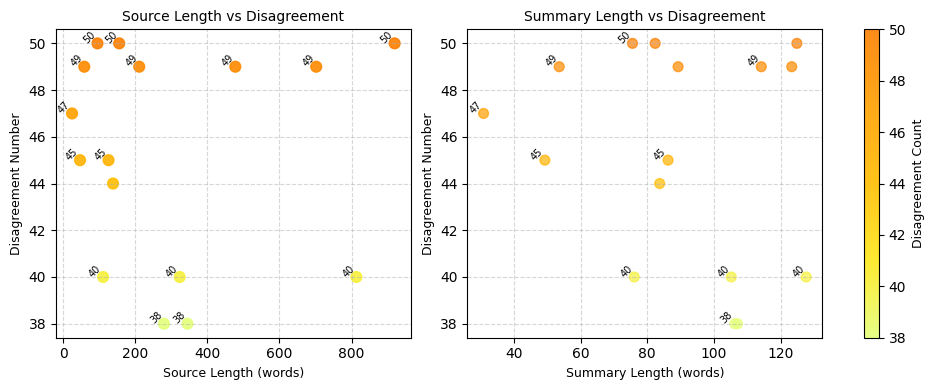

In [10]:
locals()['detector_eval-worst'].disagree_vs_length()

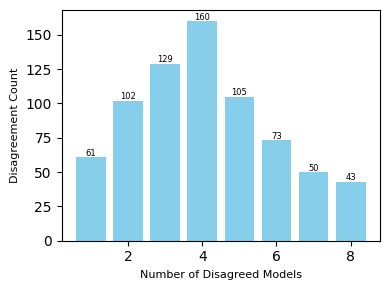

In [11]:
locals()['detector_eval-worst'].disagree_vs_model()

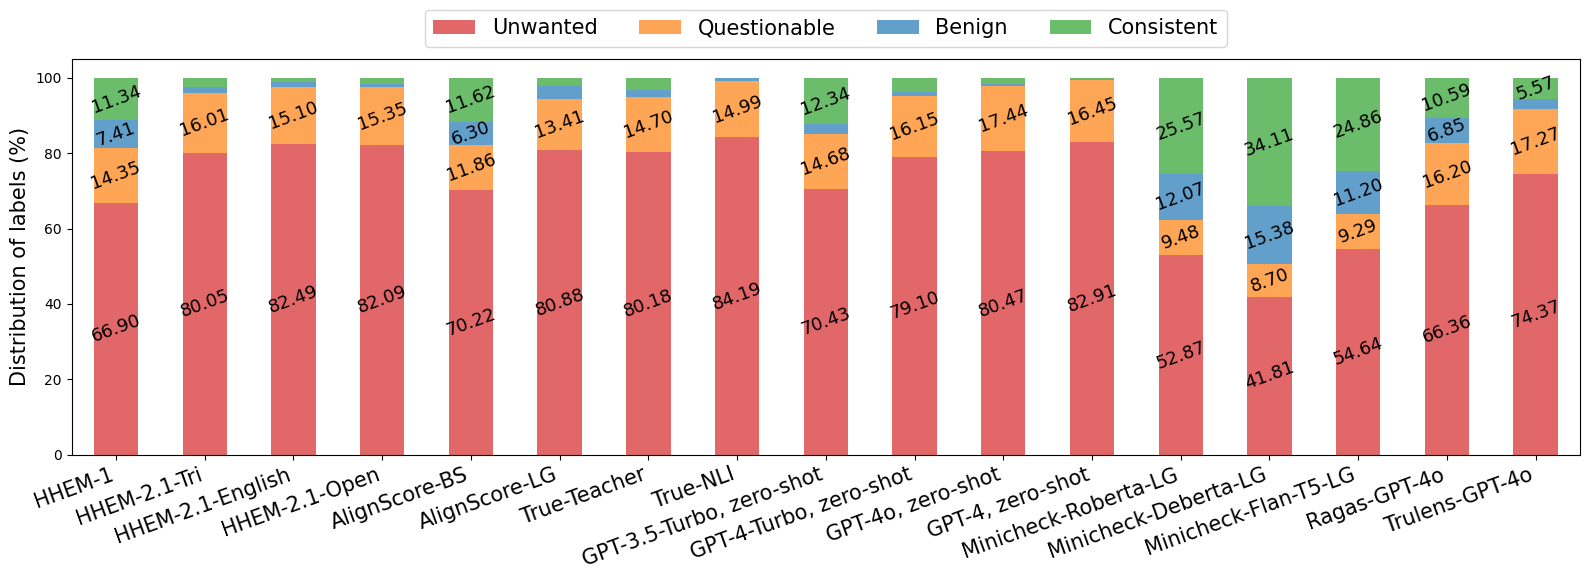

In [12]:
locals()['detector_eval-worst'].get_error_distribution()

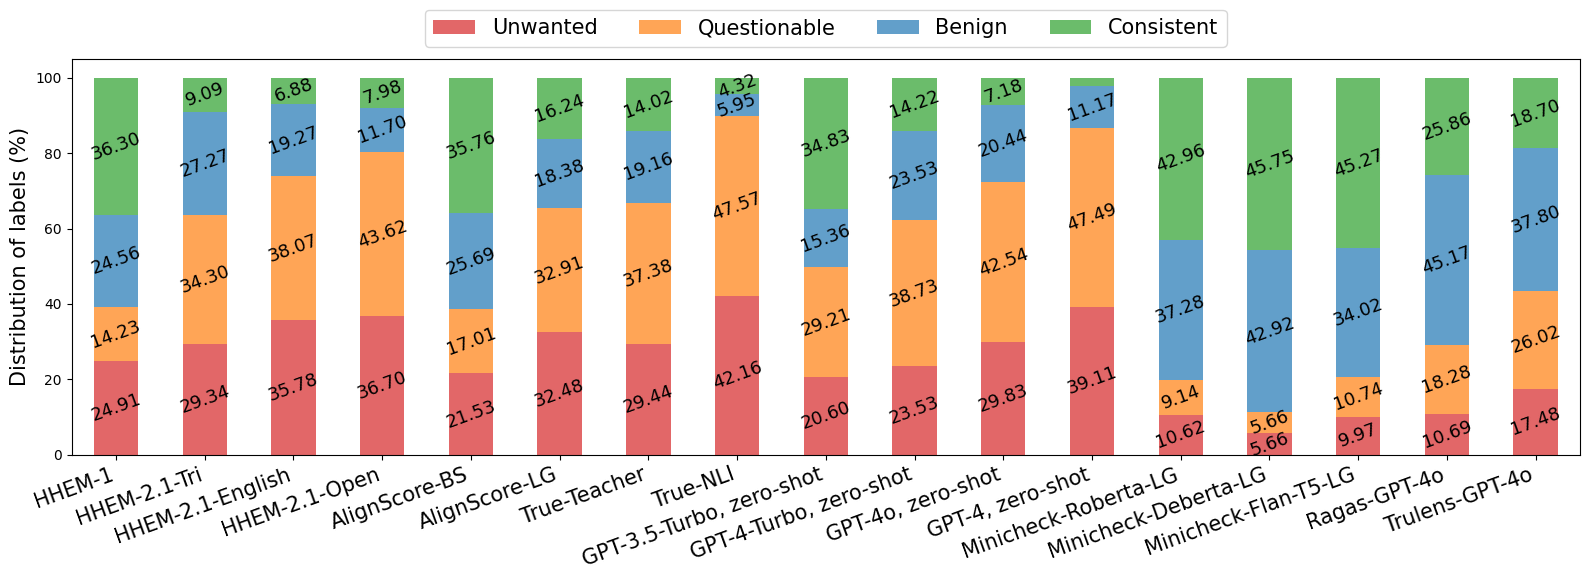

In [13]:
locals()['detector_eval-best'].get_error_distribution()